# Agua precipitable en columna estática

## Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Datos de entrada

In [3]:
p0 = 101.3 # Presión aire húmedo en la superficie del suelo (kPa)
T0 = 30 # Temperatura del aire en la superficie del suelo (°C)
alpha = 6.5 # Tasa de lapso (°C/km)
Ra = 287 # Constante gas aire húmedo
Rd = 287 # Constante gas aire seco
A = 1 # Área (m2)
H = 10 # Altura de la columna (km)
dz = 1/1000 # Tamaño de discretización espacial (km)

## Funciones

In [4]:
def temperatura(z, T0, alpha):
    # z: elevación en km
    T = -alpha*z + T0
    return T

def presion(T, p0, T0, alpha, g=9.81, Ra=287):
    p = p0 * ((T+273.15)/(T0+273.15)) ** (g/(Ra*alpha))
    return p

def presion_vapor_sat(T):
    if (T>=0):
        es = 611 * np.exp(17.27*T/(T + 237.3))
    else:
        es = 611 * np.exp(21.87*T/(T + 265.5))
    return es

def densidad_gas_ideal(p, T, R):
    ro = p/(R * (T+273.14))
    return ro

## Programa principal

In [5]:
z = np.arange(0, H + dz, dz)

p = []
T = []
es = []
ro_aire = []
ro_vapor = []
q = []
dm = []

for i, z_i in enumerate(z):
    if i == 0:
        p_i = p0
        T_i = T0
    else:
        T_i = temperatura(z_i, T0, alpha)
        p_i = presion(T_i, p0, T0, alpha/1000)
    
    es_i = presion_vapor_sat(T_i)/1000
    ro_aire_i = densidad_gas_ideal(p_i*1000, T_i, Ra)
    ro_vapor_i = densidad_gas_ideal(es_i*1000, T_i, Rd/0.622)
    q_i = ro_vapor_i/ro_aire_i
    
    p = p + [p_i]
    T = T + [T_i]
    es = es + [es_i]
    ro_aire = ro_aire + [ro_aire_i]
    ro_vapor = ro_vapor + [ro_vapor_i]
    q = q + [q_i]
    
    if i > 0:
        dm_i = (ro_vapor[i] + ro_vapor[i-1])/2 * dz * 1000 * A
        dm = dm + [dm_i]

M = np.sum(dm)

print(f'El agua precipitable total es {M:3.2f} mm')

El agua precipitable total es 74.86 mm


### Masa precipitable con la elevación

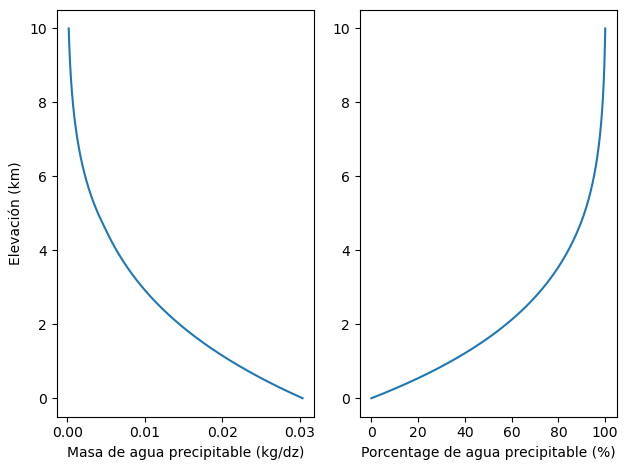

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

ax.plot(dm, z[:-1])
ax.set_xlabel('Masa de agua precipitable (kg/dz)')
ax.set_ylabel('Elevación (km)')

dM = np.cumsum(dm)/M * 100
ax = fig.add_subplot(1, 2, 2)
ax.plot(dM, z[:-1])
ax.set_xlabel('Porcentage de agua precipitable (%)')

fig.tight_layout()
plt.show()

### Presión de vapor, presión atmosférica, temperatura, y humedad específica

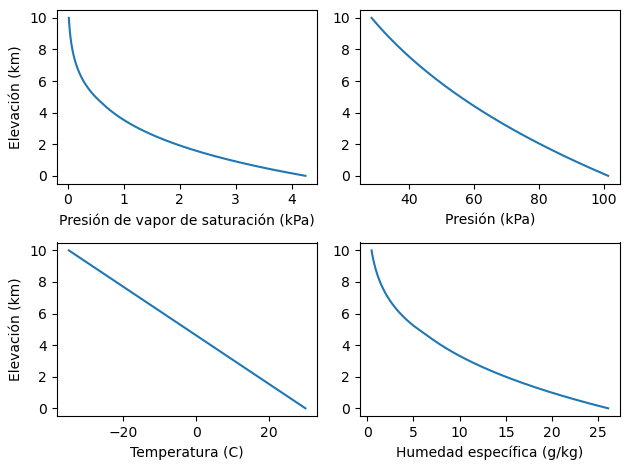

In [10]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(es, z)
axs[0,0].set_xlabel('Presión de vapor de saturación (kPa)')
axs[0,0].set_ylabel('Elevación (km)')

axs[0,1].plot(p, z)
axs[0,1].set_xlabel('Presión (kPa)')

axs[1,0].plot(T, z)
axs[1,0].set_xlabel('Temperatura (C)')
axs[1,0].set_ylabel('Elevación (km)')

axs[1,1].plot(np.array(q)*1000, z)
axs[1,1].set_xlabel('Humedad específica (g/kg)')

fig.tight_layout()
plt.show()